# T-test Practice

In this notebook, we will see how to use the t-test on some data sets using the t.test() function. 


Our example data set is the birth weight data. We will do hypothesis testing to see if there is statistically significant effects of some variables. 

We will start by comparing the birth weight between smoking and non-smoking mothers. 



In [1]:
library(tidyverse)


# Load data from MASS into a tibble
birthwt <- as_tibble(MASS::birthwt)

# Rename variables
birthwt <- birthwt %>%
  rename(birthwt.below.2500 = low, 
         mother.age = age,
         mother.weight = lwt,
         mother.smokes = smoke,
         previous.prem.labor = ptl,
         hypertension = ht,
         uterine.irr = ui,
         physician.visits = ftv,
         birthwt.grams = bwt)

# Change factor level names
birthwt <- birthwt %>%
  mutate(race = recode_factor(race, `1` = "white", `2` = "black", `3` = "other")) %>%
  mutate_at(c("mother.smokes", "hypertension", "uterine.irr", "birthwt.below.2500"),
            ~ recode_factor(.x, `0` = "no", `1` = "yes"))


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



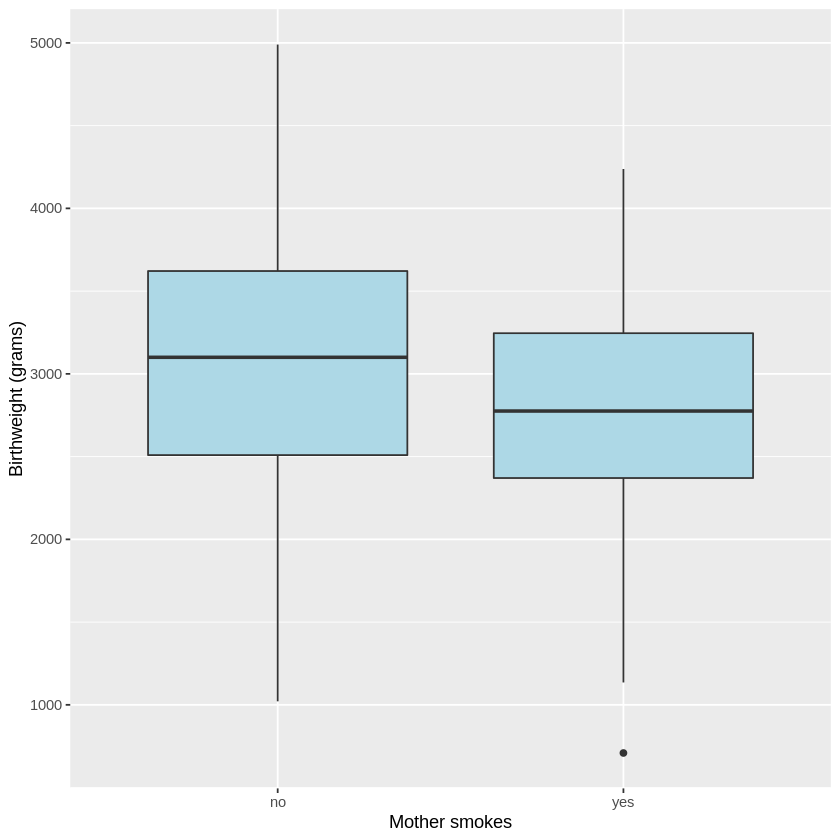

In [2]:

# Do a boxplot 
qplot(x = mother.smokes, y = birthwt.grams,
      geom = "boxplot", data = birthwt,
      xlab = "Mother smokes", 
      ylab = "Birthweight (grams)",
      fill = I("lightblue"))


Boxplot shows that the birth weight may be associated with the smoking. Let's see if there is a atatistically significant difference. 

Let's compute the mean and standard devation of birth weight for each group as well as the **standard error**.

In [3]:
birthwt %>%
  group_by(mother.smokes) %>%
  summarize(num.obs = n(),
            mean.birthwt = round(mean(birthwt.grams), 0),
            sd.birthwt = round(sd(birthwt.grams), 0),
            se.birthwt = round(sd(birthwt.grams) / sqrt(num.obs), 0))

mother.smokes,num.obs,mean.birthwt,sd.birthwt,se.birthwt
<fct>,<int>,<dbl>,<dbl>,<dbl>
no,115,3056,753,70
yes,74,2772,660,77


To assess the significance of the difference, we will use the `t.test` function. 


In [4]:
birthwt.t.test <- t.test(birthwt.grams ~ mother.smokes, data = birthwt)
birthwt.t.test


	Welch Two Sample t-test

data:  birthwt.grams by mother.smokes
t = 2.7299, df = 170.1, p-value = 0.007003
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  78.57486 488.97860
sample estimates:
 mean in group no mean in group yes 
         3055.696          2771.919 


P-value is very small, the difference is significant. The mean birth weight for smokers is 2772 grams versus 3056 grams for non-smokers. 

We can do the same analysis with a different syntax: 


In [5]:
with(birthwt, t.test(x=birthwt.grams[mother.smokes=="no"], 
                     y=birthwt.grams[mother.smokes=="yes"]))


	Welch Two Sample t-test

data:  birthwt.grams[mother.smokes == "no"] and birthwt.grams[mother.smokes == "yes"]
t = 2.7299, df = 170.1, p-value = 0.007003
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  78.57486 488.97860
sample estimates:
mean of x mean of y 
 3055.696  2771.919 


We can access to individual pieces of information like following: 

In [6]:
names(birthwt.t.test)


[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

In [7]:
birthwt.t.test$p.value   # p-value

[1] 0.007002548

In [8]:
birthwt.t.test$estimate  # group means

mean in group no mean in group yes 
         3055.696          2771.919

## Non-parametric Case

If the data does not follow normal distribution, your sample size should be very large so that your data can follow t-distribution. Otherwise,  you should run a **non-parametric test** that does not make any assumptions about normality or the 
mean. 

We can use the **Wilcoxon rank-sum test** in that case. 


In [9]:
birthwt.wilcox.test <- wilcox.test(birthwt.grams ~ mother.smokes, data=birthwt, conf.int=TRUE)
birthwt.wilcox.test


	Wilcoxon rank sum test with continuity correction

data:  birthwt.grams by mother.smokes
W = 5249.5, p-value = 0.006768
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
  85.00004 512.00005
sample estimates:
difference in location 
              306.1846 


In [10]:
# OR 

with(birthwt, wilcox.test(x=birthwt.grams[mother.smokes=="no"], 
                     y=birthwt.grams[mother.smokes=="yes"]))


	Wilcoxon rank sum test with continuity correction

data:  birthwt.grams[mother.smokes == "no"] and birthwt.grams[mother.smokes == "yes"]
W = 5249.5, p-value = 0.006768
alternative hypothesis: true location shift is not equal to 0


Again, small p-value shows that we can reject the null hypothesis. 

**Keep in mind** that you can use this test for independent samples or paired samples. In the case of **paired samples**, it's actually called **Wilcoxson signed rank test**, but you still call the same function with `paired=TRUE` option. 



**To check whether our data follows normal distribution, we can do a q-q plot.** 


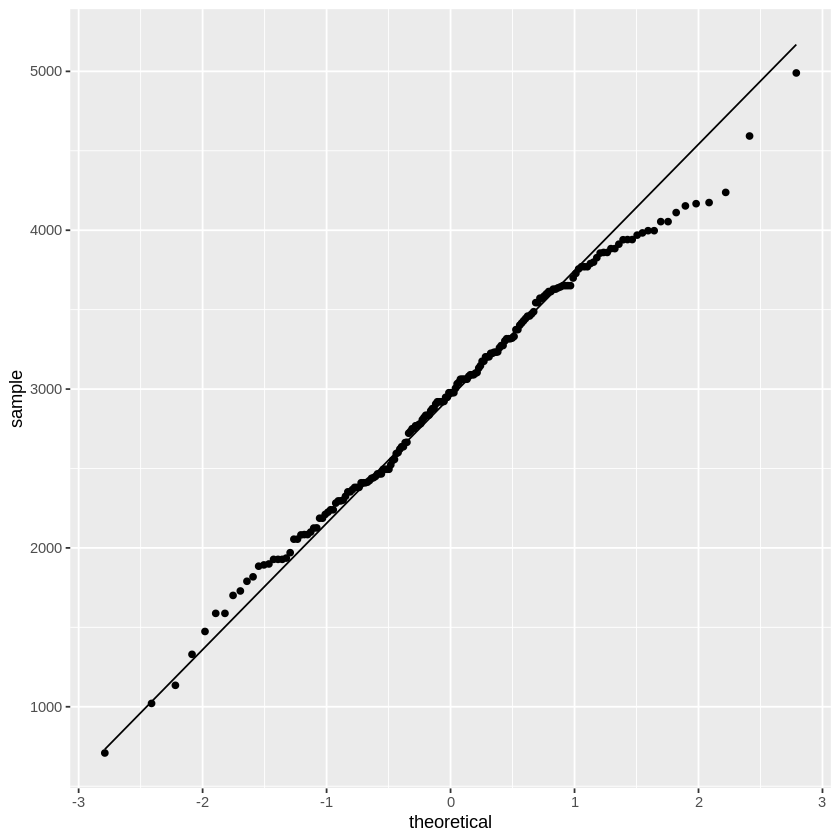

In [11]:
p.birthwt <- ggplot(data = birthwt, aes(sample = birthwt.grams))

p.birthwt + stat_qq() + stat_qq_line()

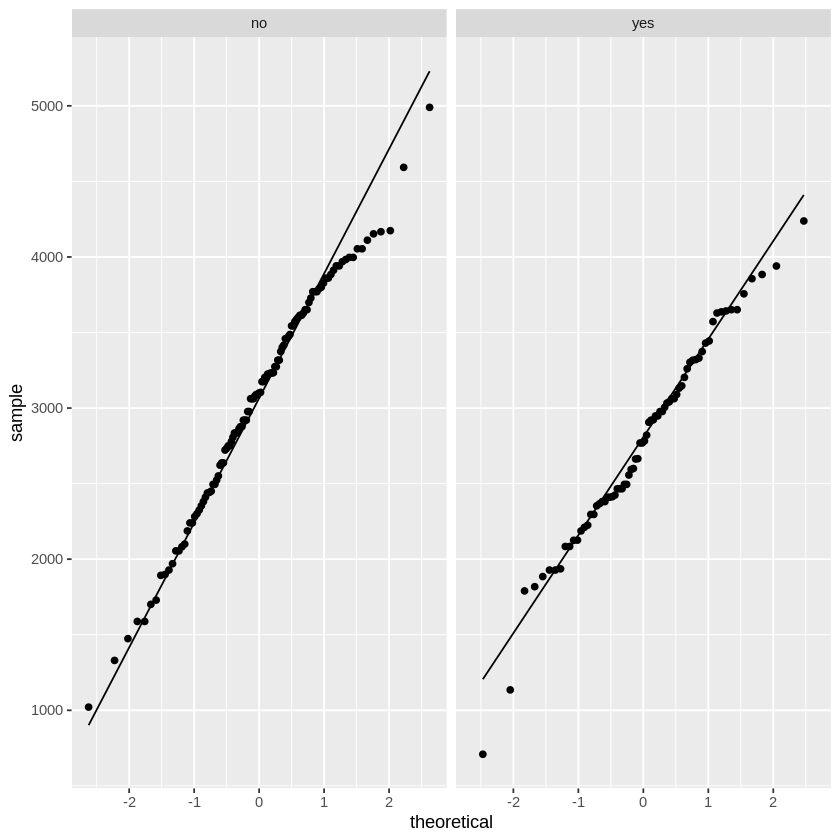

In [12]:
# Separate plots for different values of smoking status
p.birthwt + stat_qq() + stat_qq_line() + facet_grid(. ~ mother.smokes)


It is not too bad, there is no large deviation from normal distribution. 

Here’s what we would see if the data were **right-skewed.**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



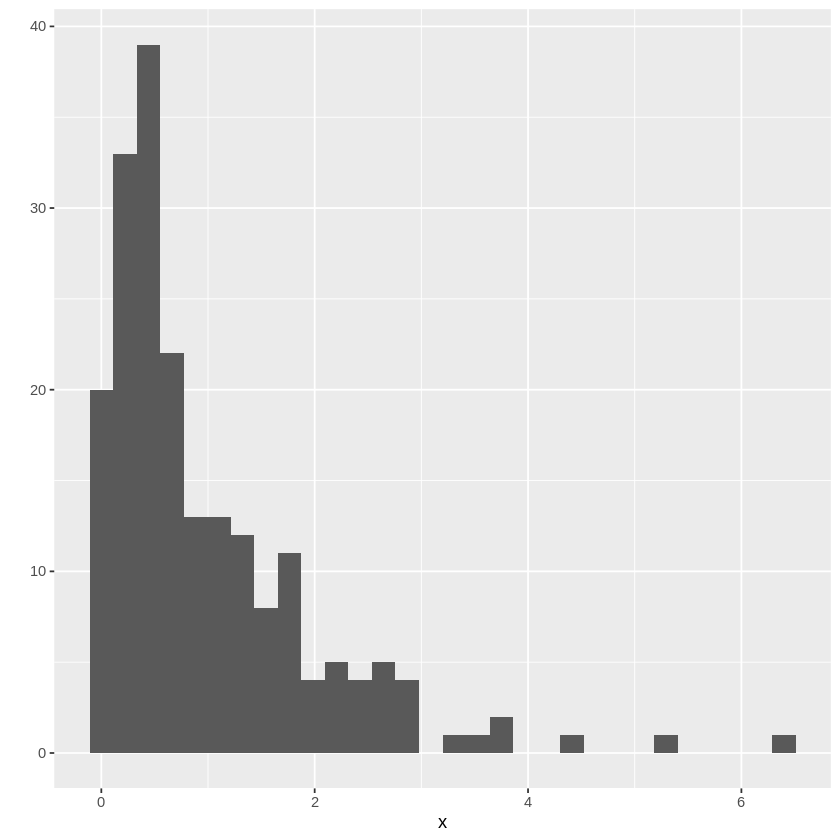

In [13]:
set.seed(12345)
fake.data <- data.frame(x = rexp(200))
p.fake <- ggplot(fake.data, aes(sample = x))
qplot(x, data = fake.data)

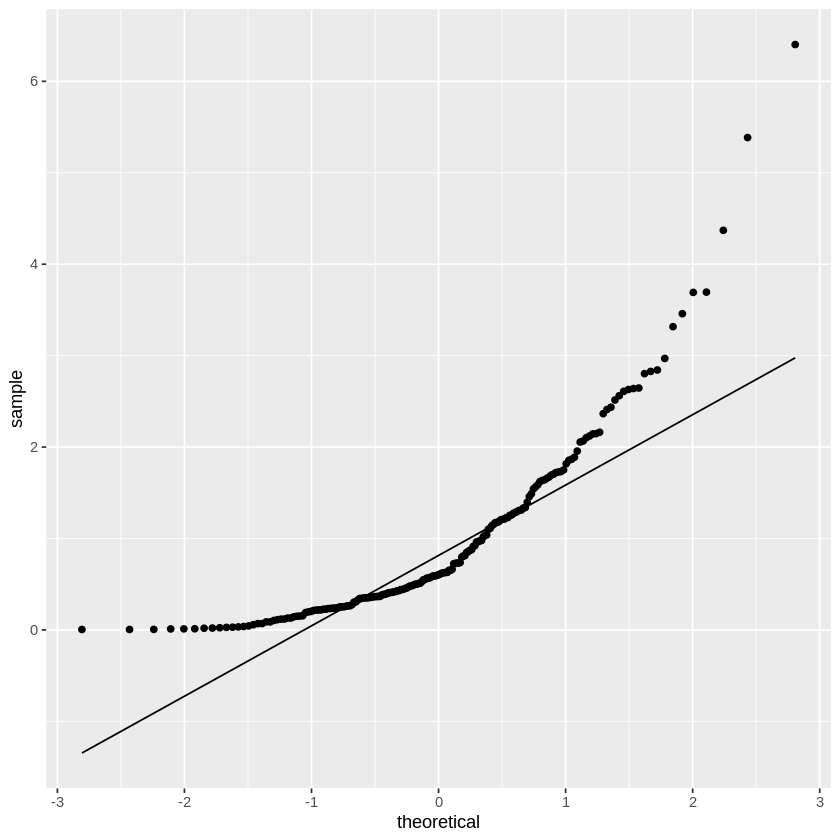

In [14]:
p.fake + stat_qq() + stat_qq_line()


This is a good indication that you should be careful if you see this type of deviation from the normal. 

---

### Categorical Variables

If we have categorical variables as opposed to continuous, we can use **Fisher's Exact Test** or **Chi-squared test**. 

In [15]:
# First create a categorical variable: 

weight.smoke.tbl <- with(birthwt, table(birthwt.below.2500, mother.smokes))
weight.smoke.tbl

                  mother.smokes
birthwt.below.2500 no yes
               no  86  44
               yes 29  30

In [16]:
# Use Fisher's exact test 
birthwt.fisher.test <- fisher.test(weight.smoke.tbl)
birthwt.fisher.test


	Fisher's Exact Test for Count Data

data:  weight.smoke.tbl
p-value = 0.03618
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.028780 3.964904
sample estimates:
odds ratio 
  2.014137 


This also shows a significant difference between birth weights. 

We can also use the Chi-squared test: 

In [17]:
chisq.test(weight.smoke.tbl)


	Pearson's Chi-squared test with Yates' continuity correction

data:  weight.smoke.tbl
X-squared = 4.2359, df = 1, p-value = 0.03958


You get essentially the same answer by running the Chi-squared test, but the output is not very useful. You are not getting an estimate or confidence interval for the odds ratio.

---

### Paired T-test 

Here is an example of a paired t-test. Take a look at the data:

In [18]:
help(sleep)

In [19]:
sleep

extra,group,ID
<dbl>,<fct>,<fct>
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6
3.7,1,7
0.8,1,8
0.0,1,9


As you can see, the two groups are **NOT** independent. They are actually **same** people given the drug and the measurements are for **before** and **after** the drug was given. We have to use a **paired t-test** here. 

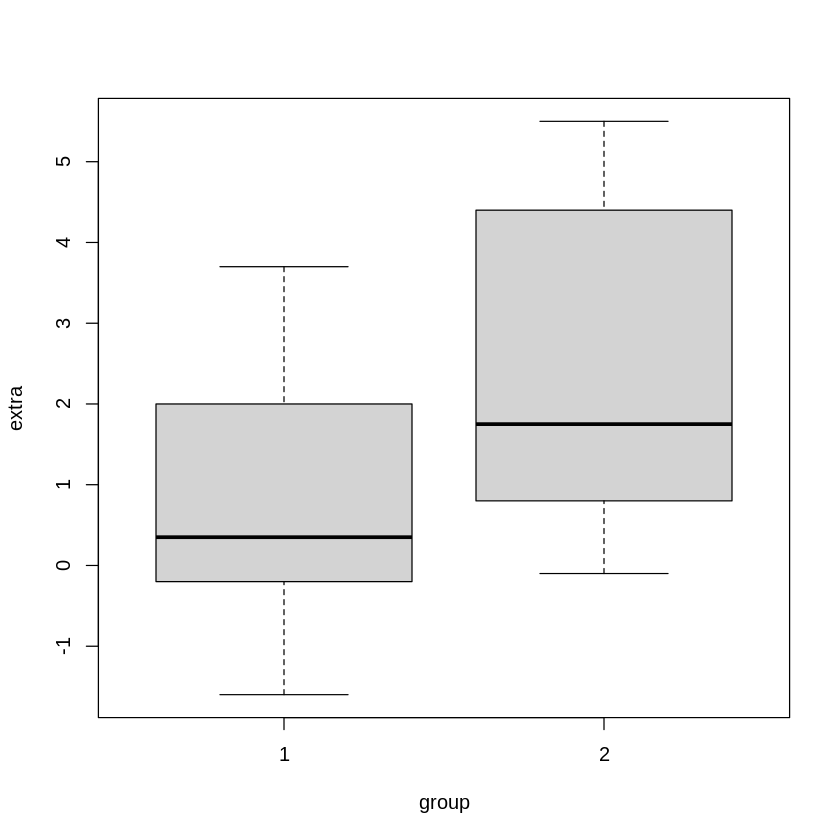

In [20]:
plot(extra ~ group, data = sleep)

In [21]:
sleep.t <- with(sleep,
     t.test(extra[group == 1],
            extra[group == 2], paired = TRUE))
sleep.t


	Paired t-test

data:  extra[group == 1] and extra[group == 2]
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


In [22]:
## The sleep *prolongations*
sleep1 <- with(sleep, extra[group == 2] - extra[group == 1])
summary(sleep1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.05    1.30    1.58    1.70    4.60 

**Take a look** at the following outputs. What do you think of about rejecting the null hypotheses ? 

In [23]:

# H1: group1 slept more than group2 

sleep.t2 <- with(sleep,
     t.test(extra[group == 1],
            extra[group == 2], paired = TRUE, alternative = "greater"))
sleep.t2


	Paired t-test

data:  extra[group == 1] and extra[group == 2]
t = -4.0621, df = 9, p-value = 0.9986
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -2.293005       Inf
sample estimates:
mean of the differences 
                  -1.58 


In [24]:

# H1: group1 slept less than group2 


sleep.t3 <- with(sleep,
     t.test(extra[group == 1],
            extra[group == 2], paired = TRUE, alternative = "less"))
sleep.t3


	Paired t-test

data:  extra[group == 1] and extra[group == 2]
t = -4.0621, df = 9, p-value = 0.001416
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.8669947
sample estimates:
mean of the differences 
                  -1.58 


### Another example: 

Suppose that the manufacturer claims that the mean lifetime of a light bulb is more than 10,000 hours. In a sample of 30 light bulbs, it was found that they only last 9,900 hours on average. Assume the sample standard deviation is 125 hours. At .05 significance level, can we reject the claim by the manufacturer?

The null hypothesis is $H_0: \mu \ge 10000$. This is waht the manufacturer claims. 

**YOUR TURN:** Find the t-statistic below: 


In [25]:
mubar = 9900
mu = 10000
s = 125
n = 30

t = (mubar-mu)/(s/sqrt(n)) 
t


[1] -4.38178

Compute the critical value at alpha=0.05

In [26]:
help(qt)

In [27]:
alpha = 0.05

t.alpha = qt(alpha, df=n-1)  # use qt() function similar to qnorm() function 
t.alpha

[1] -1.699127

The test statistic -4.3818 is less than the critical value of -1.6991. Hence, at .05 significance level, we can reject the claim that mean lifetime of a light bulb is above 10,000 hours.

Alternatively, instead of using the critical value, we apply the pt function to compute the lower tail p-value of the test statistic.

In [28]:
pval = pt(t, df=n-1) # lower tail p−value 

pval

[1] 7.035026e-05

---

**YOUR TURN:**

For the following data set, find out if there was an **improvement** in the scores of the subjects. Note that you have to create groups to use the t.test() function. 


This data seems to be about the same group of subjects and has a column `score1` and a column `score2` and is asking if there is an improvement. So we can assume that this is a paired t-test. $H_0$ should be "no improvement"; how do you write it mathematically? Do you do a one-tailed or two-tailed test? 

In [29]:
subject = seq(1,11)
score1 = c(3,3,3,12,15,16,17,19,23,24,32)
score2 = c(20,13,13,20,29,32,23,20,25,15,30)
df <-data.frame(cbind(subject,score1,score2))
head(df)

,subject,score1,score2
,<dbl>,<dbl>,<dbl>
1,1,3,20
2,2,3,13
3,3,3,13
4,4,12,20
5,5,15,29
6,6,16,32


In [30]:
# This is the difference mean; t.test() output will also show this value. 

mean(df$score1-df$score2)


[1] -6.636364

In [31]:

# 1- the following is a TWO-TAILED test, H1 is mu1 <> mu2

df.t <- with(df,
     t.test(score1, score2, paired = TRUE))
df.t


	Paired t-test

data:  score1 and score2
t = -2.7373, df = 10, p-value = 0.02093
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.038250  -1.234477
sample estimates:
mean of the differences 
              -6.636364 


In [32]:

# 2- the following is a ONE-TAILED test, H1 is mu1 < mu2 


df.t <- with(df,
     t.test(score1, score2, paired = TRUE, alternative = "less"))
df.t


	Paired t-test

data:  score1 and score2
t = -2.7373, df = 10, p-value = 0.01046
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -2.242244
sample estimates:
mean of the differences 
              -6.636364 


In [33]:
df.t <- with(df,
     t.test(score1, score2, paired = TRUE, alternative = "greater"))
df.t


	Paired t-test

data:  score1 and score2
t = -2.7373, df = 10, p-value = 0.9895
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -11.03048       Inf
sample estimates:
mean of the differences 
              -6.636364 


---
### Two-sample T-test: 

The following data contains observations on degree of polymerization for paper specimens for which viscosity times concentration fell in a certain middle range x=(418,421,421,422,425,427,431,434,437,439,446,447,448,453,454,463,465) and and higher range y=(429,430,430,431,36,437,440,441,445,446,447).

We want to test if the observations in middle range and higher range are from populations with different means, at significance level alpha=0.05 .



Run a **two-sample t.test** to see if they are from different populations. HINT: We are looking for a difference of means of two samples. So, it should be two-tailed. 

In [34]:
x = c(418,421,421,422,425,427,431,434,437,439,446,447,448,453,454,463,465)   
y = c(429,430,430,431,36,437,440,441,445,446,447)

In [35]:
help(t.test)

In [36]:

t.test(x, y, alternative="two.sided", mu=0, var.equal=F, conf.level=0.95) 


	Welch Two Sample t-test

data:  x and y
t = 1.0123, df = 10.202, p-value = 0.3348
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -44.46343 118.86984
sample estimates:
mean of x mean of y 
 438.2941  401.0909 


**What is your interpretation?** Why do we need to use `var.equal`? 